# IMPORTS

In [237]:
#!pip uninstall -y numpy scikit-learn scipy
#!pip install numpy==1.24.3 scikit-learn==1.5.1 scipy==1.10.1


import sklearn
print(sklearn.__version__)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, mean_squared_error
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso
!pip install catboost
import catboost as cb
import pickle

import matplotlib.pyplot as plt

1.5.2


# LECTURA DE ARCHIVOS

In [238]:
archivo = "inmuebles_CABA.csv"

In [239]:
df_inmueble = pd.read_csv(archivo)

<ipython-input-239-e8e6ec971209>:1: DtypeWarning: Columns (4,5,6,7,8,13,14,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_inmueble = pd.read_csv(archivo)


# ANALISIS EXPLORATORIO

## Conversion de monedas (USD)

In [240]:
valor_dolar = 1000

### Operaciones en dolares

#### Precio

In [241]:
df_inmueble = df_inmueble.dropna(subset=['precio'])
df_usd = df_inmueble[df_inmueble['precio'].str.contains('^USD', regex=True)]

In [242]:
df_usd.loc[:, 'precio'] = df_usd['precio'].str.replace('USD', '').str.replace('.', '').astype(float)

#### Expensas

In [243]:
df_usd.loc[:, 'expensas'] = df_usd['expensas'].str.replace('$', '').str.replace('.', '').astype(float)

In [244]:
df_usd.loc[:, 'expensas'] = df_usd['expensas'] / valor_dolar

In [245]:
df_usd.head()

,precio,expensas,direccion,localidad,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,...,hidromasaje,parrilla,permite_mascotas,pileta,sala_de_juegos,solarium,uso_comercial,amoblado.1,acceso_movilidad_reducida,provincia
0,800000.0,60.0,DOBLAS 955,"Caballito, Capital Federal",50,49,2,1,1,4 años,...,NaN,True,NaN,True,True,True,True,NaN,True,CABA
1,700000.0,235.0,MANUEL UGARTE 2400. Entre Esquina ciudad de la...,"Belgrano, Capital Federal",65,59,3,2,2,19 años,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,CABA
2,700000.0,NaN,Mendoza,"Villa Urquiza, Capital Federal",74,74,2,2,1,40 años,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CABA
3,550000.0,78.0,French 3031,"Recoleta, Capital Federal",41,37,2,1,1,12 años,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CABA
4,550000.0,65.0,Malabia al 100,"Villa Crespo, Capital Federal",64,58,3,1,2,A estrenar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CABA


### Operaciones en pesos

#### Precio

In [246]:
df_ars = df_inmueble[df_inmueble['precio'].str.contains('^\$', regex=True)]

In [247]:
df_dolarizado = df_ars.copy()
df_dolarizado['precio'] = df_dolarizado['precio'].str.replace('$', '').str.replace('.', '')

def es_float(valor):
    try:
        float(valor)
        return True
    except ValueError:
        return False

# Elimino aquellos registros que no se puedan castear. Por ejemplo si incluyen otro simbolo de otra moneda.
df_dolarizado = df_dolarizado[df_dolarizado['precio'].apply(es_float)]

df_dolarizado['precio'] = df_dolarizado['precio'].astype(float)

df_dolarizado['precio'] = df_dolarizado['precio'] / valor_dolar

#### Expensas

In [248]:
df_dolarizado.loc[:, 'expensas'] = df_dolarizado['expensas'].str.replace('$', '').str.replace('.', '').astype(float)

In [249]:
df_dolarizado.loc[:, 'expensas'] = df_dolarizado['expensas'] / valor_dolar

In [250]:
df_dolarizado.head()

,precio,expensas,direccion,localidad,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,...,hidromasaje,parrilla,permite_mascotas,pileta,sala_de_juegos,solarium,uso_comercial,amoblado.1,acceso_movilidad_reducida,provincia
233,5000.0,440.0,Quintana al 400,"Recoleta, Capital Federal",200,NaN,5,2,4,63 años,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,CABA
251,4850.0,120.0,Av. Azucena Villaflor 489,"Puerto Madero, Capital Federal",160,150,3,2,2,13 años,...,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,CABA
252,4600.0,164.0,Av. Libertador 5400. Entre Virrey del pino y V...,"Belgrano, Capital Federal",260,240,7,5,6,60 años,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CABA
254,4500.0,NaN,AV. Corrientes Abasto - Local 3 al 3400,"Abasto, Capital Federal",230,210,NaN,2,NaN,En construcción,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CABA
374,4000.0,25.0,Monoambiente en alquiler en San Cristobal 2200,"San Cristobal, Capital Federal",41,NaN,NaN,NaN,NaN,A estrenar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,CABA


### Resultado

In [251]:
df_inmuebles_dolarizado = pd.concat([df_usd, df_dolarizado], axis=0)

In [252]:
df_inmuebles_dolarizado.head()

,precio,expensas,direccion,localidad,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,...,hidromasaje,parrilla,permite_mascotas,pileta,sala_de_juegos,solarium,uso_comercial,amoblado.1,acceso_movilidad_reducida,provincia
0,800000.0,60.0,DOBLAS 955,"Caballito, Capital Federal",50,49,2,1,1,4 años,...,NaN,True,NaN,True,True,True,True,NaN,True,CABA
1,700000.0,235.0,MANUEL UGARTE 2400. Entre Esquina ciudad de la...,"Belgrano, Capital Federal",65,59,3,2,2,19 años,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,CABA
2,700000.0,NaN,Mendoza,"Villa Urquiza, Capital Federal",74,74,2,2,1,40 años,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CABA
3,550000.0,78.0,French 3031,"Recoleta, Capital Federal",41,37,2,1,1,12 años,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CABA
4,550000.0,65.0,Malabia al 100,"Villa Crespo, Capital Federal",64,58,3,1,2,A estrenar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CABA


## Eliminacion de duplicados

In [253]:
df_inmuebles_dolarizado.drop_duplicates(inplace=True)

## Unificacion columna Laundry / Lavadero / Lavarropas / Secarropas

In [254]:
df_inmuebles_dolarizado[['laundry', 'lavadero', 'lavarropas', 'secarropas']] = df_inmuebles_dolarizado[['laundry', 'lavadero', 'lavarropas', 'secarropas']].notna().astype(int)

df_inmuebles_dolarizado['limpieza_de_ropa'] = df_inmuebles_dolarizado[['laundry', 'lavadero', 'lavarropas', 'secarropas']].sum(axis=1)

In [255]:
df_inmuebles_dolarizado.drop(['laundry', 'lavadero','lavarropas','secarropas'], axis=1, inplace=True)

## Equipamiento de cocina

In [256]:
df_inmuebles_dolarizado[['cocina_equipada', 'frigobar', 'microondas']] = df_inmuebles_dolarizado[['cocina_equipada', 'frigobar', 'microondas']].notna().astype(int)

df_inmuebles_dolarizado['equipamiento_de_cocina'] = df_inmuebles_dolarizado[['cocina_equipada', 'frigobar', 'microondas']].sum(axis=1)

In [257]:
df_inmuebles_dolarizado.drop(['cocina_equipada', 'frigobar','microondas'], axis=1, inplace=True)

## Elimino columna "amoblado" (Repetida)

In [258]:
df_inmuebles_dolarizado.drop(['amoblado.1'], axis=1, inplace=True)

## Ordeno de mayor a menor

In [259]:
df_inmuebles_dolarizado = df_inmuebles_dolarizado.sort_values(by='precio', ascending=False)

## Modifico booleanos a enteros

In [260]:
object_columns = df_inmuebles_dolarizado.select_dtypes(include=['object']).columns
df_inmuebles_dolarizado[object_columns] = df_inmuebles_dolarizado[object_columns].astype(str)
df_inmuebles_dolarizado = df_inmuebles_dolarizado.replace('True', 1)
df_inmuebles_dolarizado = df_inmuebles_dolarizado.fillna(0)
df_inmuebles_dolarizado = df_inmuebles_dolarizado.replace('nan', 0)

<ipython-input-260-a944668d01b8>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_inmuebles_dolarizado = df_inmuebles_dolarizado.replace('nan', 0)


## One hot encoding

In [261]:
df_inmuebles = pd.get_dummies(df_inmuebles_dolarizado, columns=['disposicion', 'orientacion', 'luminosidad','estado_general'], drop_first=True)

In [262]:
booleanos = df_inmuebles.select_dtypes(include=['bool']).columns

df_inmuebles[booleanos] = df_inmuebles[booleanos].astype(int)

## Modificar antiguedad

In [263]:
df_inmuebles['antiguedad'] = df_inmuebles['antiguedad'].str.extract(r'(\d+)', expand=False)
df_inmuebles['antiguedad'] = pd.to_numeric(df_inmuebles['antiguedad']).fillna(0).astype(int)

## Casteo de tipos de datos

In [264]:
columnas_a_convertir = [
    'cantidad_de_toiletes', 'cantidad_de_cocheras', 'cantidad_de_dormitorios',
    'cantidad_de_banios', 'superficie_total', 'superficie_cubierta', 'cantidad_de_ambiente'
]

for col in columnas_a_convertir:
    df_inmuebles[col] = pd.to_numeric(df_inmuebles[col], errors='coerce').fillna(0).astype('int64')

df_inmuebles['expensas'] = pd.to_numeric(df_inmuebles['expensas'], errors='coerce').fillna(0).astype('int64')
df_inmuebles['precio'] = pd.to_numeric(df_inmuebles['precio'], errors='coerce').fillna(0).astype('int64')

## Elimino los que no tienen precio o cantidad de metros cuadrados

In [265]:
df_inmuebles = df_inmuebles[df_inmuebles['superficie_total'] != 0]
df_inmuebles = df_inmuebles[df_inmuebles['precio'] != 0]

## Precio por metro cuadrado

In [266]:
df_inmuebles['precio_m2'] = df_inmuebles['precio'] / df_inmuebles['superficie_total']
df_inmuebles.head()

,precio,expensas,direccion,localidad,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,...,orientacion_S,orientacion_SE,orientacion_SO,luminosidad_Luminoso,luminosidad_Muy luminoso,luminosidad_Poco luminoso,estado_general_Excelente,estado_general_Muy bueno,estado_general_Reciclado,precio_m2
52,3850000,1990,Demaría 4500,"Palermo, Capital Federal",400,390,4,6,3,25,...,0,0,0,0,1,0,0,0,0,9625.000000
61,3800000,990,Demaría 4500,"Palermo Chico, Palermo",400,390,5,6,4,22,...,0,0,0,0,1,0,0,0,0,9500.000000
105,3500000,900,DEMARIA 4500,"Palermo, Capital Federal",380,380,5,5,4,28,...,0,0,0,0,0,0,0,0,0,9210.526316
196,2800000,250,FIGUEROA ALCORTA Y TAGLE,"Barrio Parque, Palermo",780,550,8,4,2,0,...,0,0,0,0,1,0,0,0,0,3589.743590
9542,2800000,250,FIGUEROA ALCORTA Y TAGLE,"Barrio Parque, Palermo",78,55,8,4,2,0,...,0,0,0,0,1,0,0,0,0,35897.435897


## Eliminar outliers (INTERCUARTIL)



In [267]:
def eliminar_outliers(grupo):
    Q1 = grupo['precio_m2'].quantile(0.25)
    Q3 = grupo['precio_m2'].quantile(0.75)
    IQR = Q3 - Q1
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR
    return grupo[(grupo['precio_m2'] >= umbral_inferior) & (grupo['precio_m2'] <= umbral_superior)]

# Agrupa por 'barrio' y elimina los outliers
df_inmuebles = df_inmuebles.groupby('localidad').apply(eliminar_outliers).reset_index(drop=True)

<ipython-input-267-78f137d9c22b>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_inmuebles = df_inmuebles.groupby('localidad').apply(eliminar_outliers).reset_index(drop=True)


In [268]:
def eliminar_outliers(grupo):
    Q1 = grupo['precio'].quantile(0.25)
    Q3 = grupo['precio'].quantile(0.75)
    IQR = Q3 - Q1
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR
    return grupo[(grupo['precio'] >= umbral_inferior) & (grupo['precio'] <= umbral_superior)]

# Agrupa por 'barrio' y elimina los outliers
df_inmuebles = df_inmuebles.groupby('localidad').apply(eliminar_outliers).reset_index(drop=True)
df_inmuebles.head()

<ipython-input-268-23c8a1c7cec8>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_inmuebles = df_inmuebles.groupby('localidad').apply(eliminar_outliers).reset_index(drop=True)


,precio,expensas,direccion,localidad,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,...,orientacion_S,orientacion_SE,orientacion_SO,luminosidad_Luminoso,luminosidad_Muy luminoso,luminosidad_Poco luminoso,estado_general_Excelente,estado_general_Muy bueno,estado_general_Reciclado,precio_m2
0,800,0,Avenida Córdoba 2700,"Abasto, Capital Federal",72,50,3,1,2,0,...,0,0,0,1,0,0,0,0,0,11.111111
1,700,0,Gallo al 600,"Abasto, Capital Federal",70,70,3,2,2,20,...,0,0,0,0,0,0,0,0,0,10.000000
2,690,150,Gallo 955,"Abasto, Capital Federal",52,50,2,1,1,13,...,0,0,0,0,1,0,0,0,0,13.269231
3,690,150,Gallo 955,"Abasto, Capital Federal",52,50,2,1,1,13,...,0,0,0,0,1,0,0,0,0,13.269231
4,600,0,Jean Jaures 990,"Abasto, Capital Federal",45,45,3,1,2,50,...,0,0,0,0,1,0,0,0,0,13.333333


In [269]:
print(len(df_inmuebles))

9955


## Elimino los que no tienen localidad

In [270]:
df_inmuebles = df_inmuebles.fillna(0)

df_inmuebles = df_inmuebles[df_inmuebles['localidad'] != 0]

## Elimino localidades erroneas

In [271]:
df_inmuebles = df_inmuebles[df_inmuebles["localidad"] != "Otro, Capital Federal"]

## Target encoding localidad

In [272]:
# TARGET ENCODING PRECIO M2 Y PRECIO
mean_encoded = df_inmuebles.groupby('localidad')['precio_m2'].mean()
df_inmuebles['precio_m2_medio_localidad'] = df_inmuebles['localidad'].map(mean_encoded)

mean_encoded = df_inmuebles.groupby('localidad')['precio'].mean()
df_inmuebles['precio_medio_localidad'] = df_inmuebles['localidad'].map(mean_encoded)

## Filtro por diferencia entre precio m2 y precio m2 promedio de la localidad

In [273]:
# Puse 25% de diferencia por que me parecio un numero razonable, los modelos se adaptan bien y el dataset no se acorta tanto.
lower_limit = df_inmuebles['precio_m2_medio_localidad'] * 0.75
upper_limit = df_inmuebles['precio_m2_medio_localidad'] * 1.25

df_inmuebles = df_inmuebles[(df_inmuebles['precio_m2'] >= lower_limit) & (df_inmuebles['precio_m2'] <= upper_limit)]

# CREAR CSV

In [274]:
df_inmuebles.to_csv('df_inmuebles.csv', index=False)



## Elimino columnas para poder correr el modelo

In [275]:
df_inmuebles = df_inmuebles.drop(['provincia','direccion','expensas','localidad'], axis=1)

# GRAFICOS

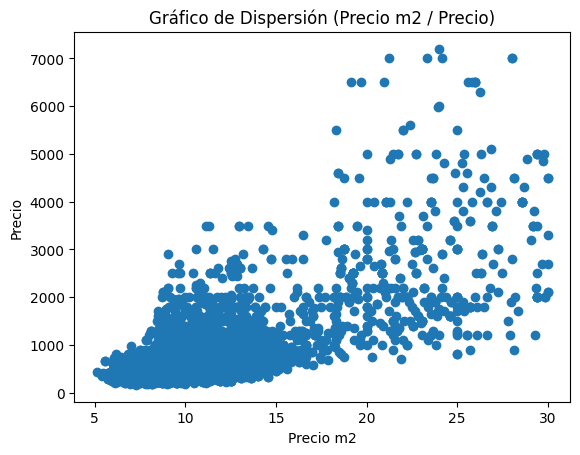

In [276]:
# GRAFICO DE DISPERSON PRECIO M2 / PRECIO

plt.scatter(df_inmuebles['precio_m2'], df_inmuebles['precio'])

plt.title('Gráfico de Dispersión (Precio m2 / Precio)')
plt.xlabel('Precio m2')
plt.ylabel('Precio')

plt.show()

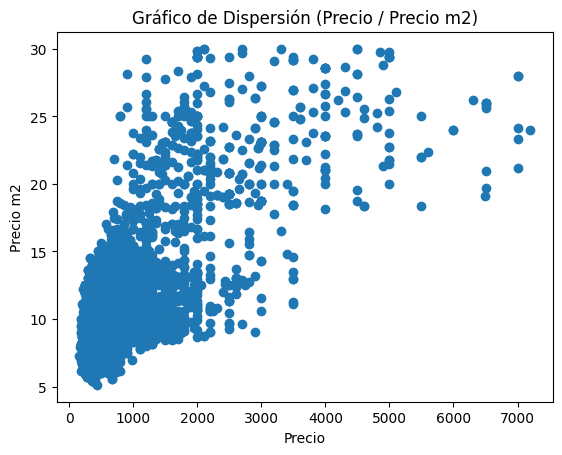

In [277]:
# GRAFICO DE DISPERSON PRECIO / PRECIO M2

plt.scatter(df_inmuebles['precio'], df_inmuebles['precio_m2'])

plt.title('Gráfico de Dispersión (Precio / Precio m2)')
plt.xlabel('Precio')
plt.ylabel('Precio m2')

plt.show()

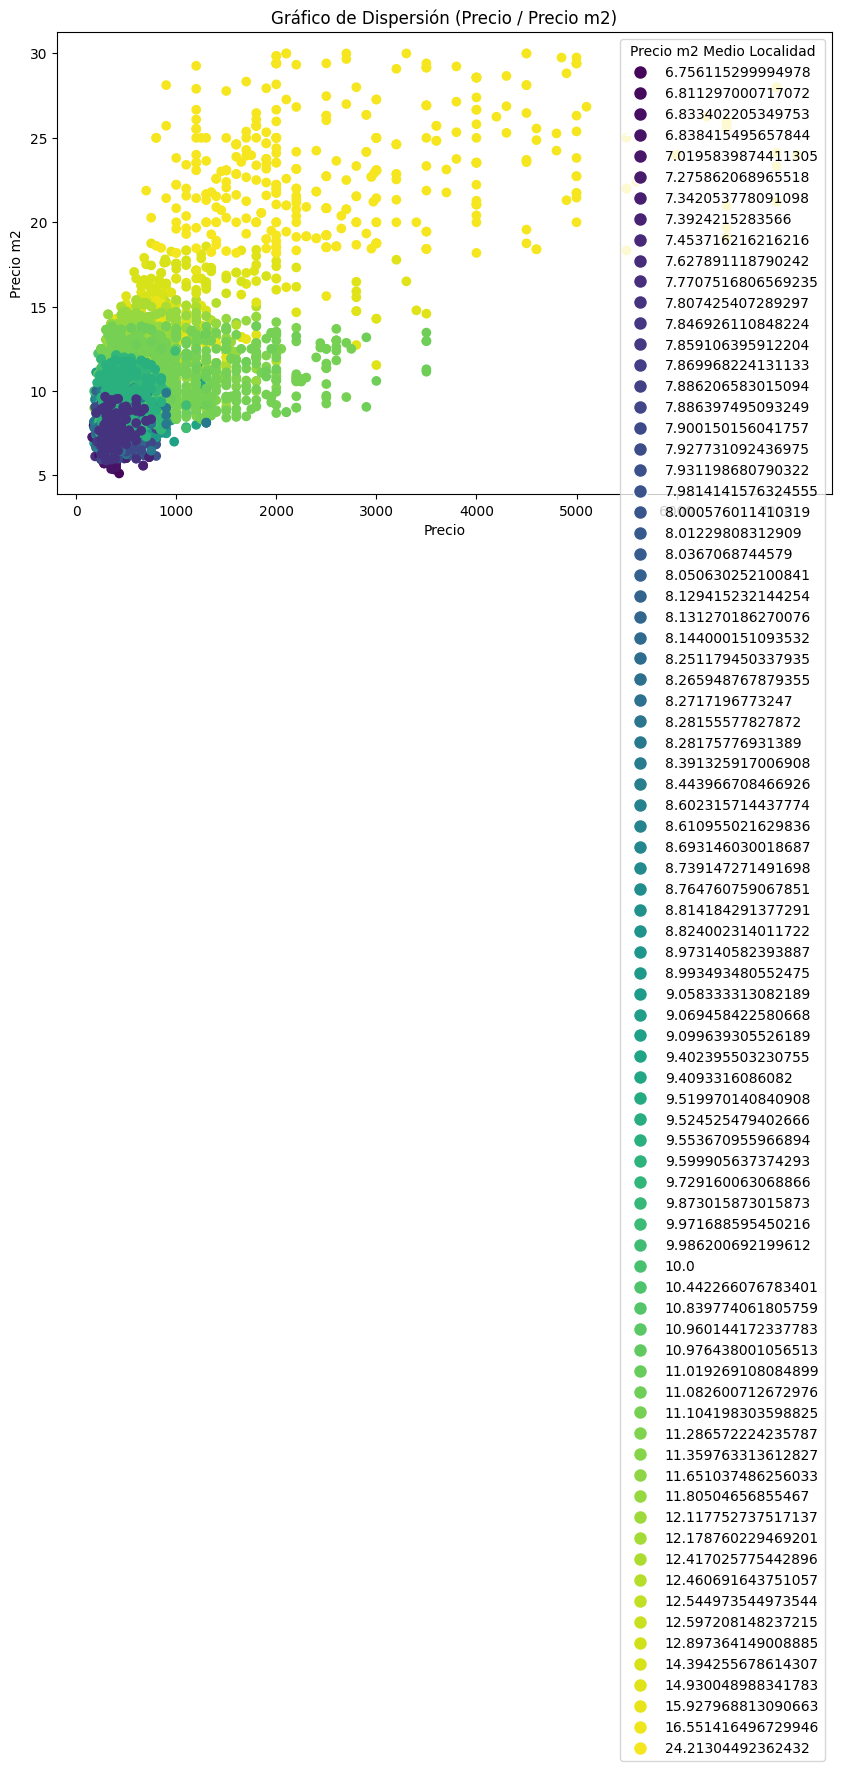

In [278]:
unique_values = np.sort(df_inmuebles['precio_m2_medio_localidad'].unique())
palette = sns.color_palette("viridis", len(unique_values))
color_dict = {value: palette[i] for i, value in enumerate(unique_values)}

# Asignar colores a cada punto
colors = df_inmuebles['precio_m2_medio_localidad'].map(color_dict)

plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión
plt.scatter(df_inmuebles['precio'], df_inmuebles['precio_m2'], c=colors)

plt.title('Gráfico de Dispersión (Precio / Precio m2)')
plt.xlabel('Precio')
plt.ylabel('Precio m2')

# Crear una leyenda personalizada
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[val], markersize=10) for val in unique_values]
labels = [str(val) for val in unique_values]
plt.legend(handles, labels, title='Precio m2 Medio Localidad')

plt.show()

# MODELOS

In [279]:
df_inmuebles.head()

,precio,superficie_total,superficie_cubierta,cantidad_de_ambiente,cantidad_de_banios,cantidad_de_dormitorios,antiguedad,cantidad_de_cocheras,cantidad_de_toiletes,aire_acondicionado,...,orientacion_SO,luminosidad_Luminoso,luminosidad_Muy luminoso,luminosidad_Poco luminoso,estado_general_Excelente,estado_general_Muy bueno,estado_general_Reciclado,precio_m2,precio_m2_medio_localidad,precio_medio_localidad
0,800,72,50,3,1,2,0,0,0,1,...,0,1,0,0,0,0,0,11.111111,9.524525,418.178571
1,700,70,70,3,2,2,20,0,1,0,...,0,0,0,0,0,0,0,10.000000,9.524525,418.178571
5,580,60,60,3,1,2,30,0,0,0,...,0,0,1,0,0,0,0,9.666667,9.524525,418.178571
9,400,53,52,3,1,2,0,0,0,1,...,0,0,1,0,0,0,0,7.547170,9.524525,418.178571
11,400,49,41,2,1,1,19,0,0,1,...,0,0,0,0,0,0,0,8.163265,9.524525,418.178571


## Cat Boost

In [280]:
# Separar las características y el objetivo
X = df_inmuebles.drop('precio', axis=1)
y = df_inmuebles['precio']

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el modelo con todas las características
model = cb.CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    l2_leaf_reg=5,
    subsample=1.0,
    colsample_bylevel=0.9,
    bagging_temperature=2,
    random_strength=0,
    verbose=0
)

model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = model.get_feature_importance()

# Crear un DataFrame para las importancias
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

print(importance_df)

# Filtrar las características con importancia mayor al 0.1%
important_features = importance_df[importance_df['Importance'] > 0.25]['Feature']

print(important_features)

# Filtrar las características en X
X_filtered = df_inmuebles[important_features.tolist() + ['precio']]
X_train_filtered = X_filtered.drop('precio', axis=1)
y_filtered = X_filtered['precio']

# Dividir el dataset filtrado en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_train_filtered, y_filtered, test_size=0.2, random_state=42)

# Escalar las características filtradas
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from joblib import dump

dump(scaler, 'scaler.joblib')


# Reentrenar el modelo con las características filtradas
model_filtered = cb.CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    l2_leaf_reg=5,
    subsample=1.0,
    colsample_bylevel=0.9,
    bagging_temperature=2,
    random_strength=0,
    verbose=0
)

model_filtered.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = model_filtered.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Guardar el modelo
with open('modelo_filtrado.pkl', 'wb') as file:
    pickle.dump(model_filtered, file)

                      Feature  Importance
0            superficie_total   47.380717
1         superficie_cubierta    5.289980
2        cantidad_de_ambiente    0.268584
3          cantidad_de_banios    0.107248
4     cantidad_de_dormitorios    0.001915
..                        ...         ...
58   estado_general_Muy bueno    0.000000
59   estado_general_Reciclado    0.000000
60                  precio_m2   42.107786
61  precio_m2_medio_localidad    4.617287
62     precio_medio_localidad    0.079867

[63 rows x 2 columns]
0              superficie_total
1           superficie_cubierta
2          cantidad_de_ambiente
60                    precio_m2
61    precio_m2_medio_localidad
Name: Feature, dtype: object
Mean Squared Error: 360.8541986640558


In [281]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Hacer predicciones y evaluar el modelo en el conjunto de entrenamiento
y_train_pred = model_filtered.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Train Mean Squared Error:", mse_train)
print("Train Mean Absolute Error:", mae_train)
print("Train R^2 Score:", r2_train)

# Hacer predicciones y evaluar el modelo en el conjunto de prueba
y_test_pred = model_filtered.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test Mean Squared Error:", mse_test)
print("Test Mean Absolute Error:", mae_test)
print("Test R^2 Score:", r2_test)


Train Mean Squared Error: 30.5736657245328
Train Mean Absolute Error: 3.358442997123901
Train R^2 Score: 0.9999415619825458
Test Mean Squared Error: 360.8541986640558
Test Mean Absolute Error: 5.941820466677439
Test R^2 Score: 0.9991762477487033



Tabla de Comparación:
          Precio Real ($)  Precio Predicho ($)  Error Absoluto ($)  \
143            590.000000           584.499380            5.500620   
1385          1500.000000          1508.964285            8.964285   
2011           390.000000           392.631032            2.631032   
1183           300.000000           300.963099            0.963099   
9327           310.000000           308.195790            1.804210   
...                   ...                  ...                 ...   
9452           550.000000           553.362124            3.362124   
6809          2700.000000          2626.734917           73.265083   
9240           230.000000           233.431536            3.431536   
7694           800.000000           795.461456            4.538544   
Promedio       717.329811           717.753294            5.941820   

          Error Cuadrático ($²)  
143                   30.256821  
1385                  80.358409  
2011                   6.922328  


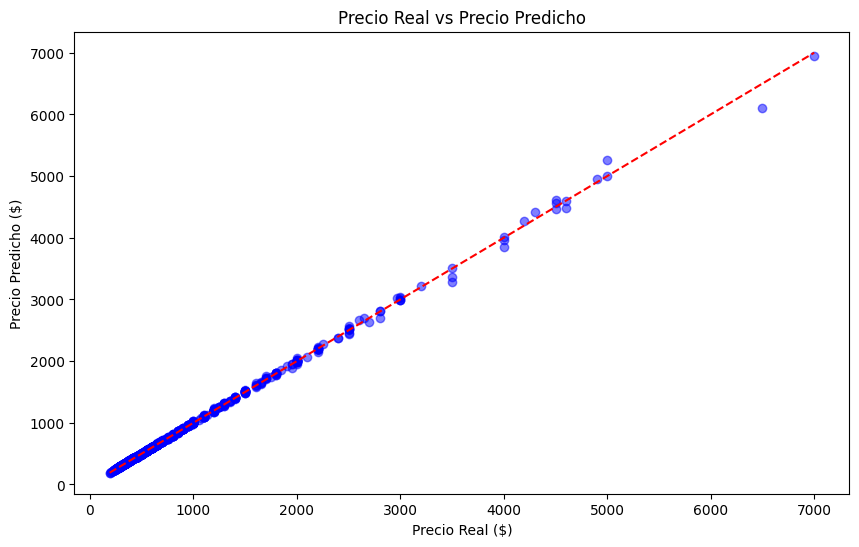

In [282]:
errores_absolutos = [abs(real - pred) for real, pred in zip(y_test, y_pred)]
errores_cuadraticos = [(real - pred)**2 for real, pred in zip(y_test, y_pred)]

df_comparacion = pd.DataFrame({
    'Precio Real ($)': y_test,
    'Precio Predicho ($)': y_pred,
    'Error Absoluto ($)': errores_absolutos,
    'Error Cuadrático ($²)': errores_cuadraticos
})

df_comparacion.loc['Promedio'] = df_comparacion.mean()

print("\nTabla de Comparación:")
print(df_comparacion)

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Precio Real ($)')
plt.ylabel('Precio Predicho ($)')
plt.title('Precio Real vs Precio Predicho')
plt.show()

               Característica  Importancia
0            superficie_total    47.380717
60                  precio_m2    42.107786
1         superficie_cubierta     5.289980
61  precio_m2_medio_localidad     4.617287
2        cantidad_de_ambiente     0.268584


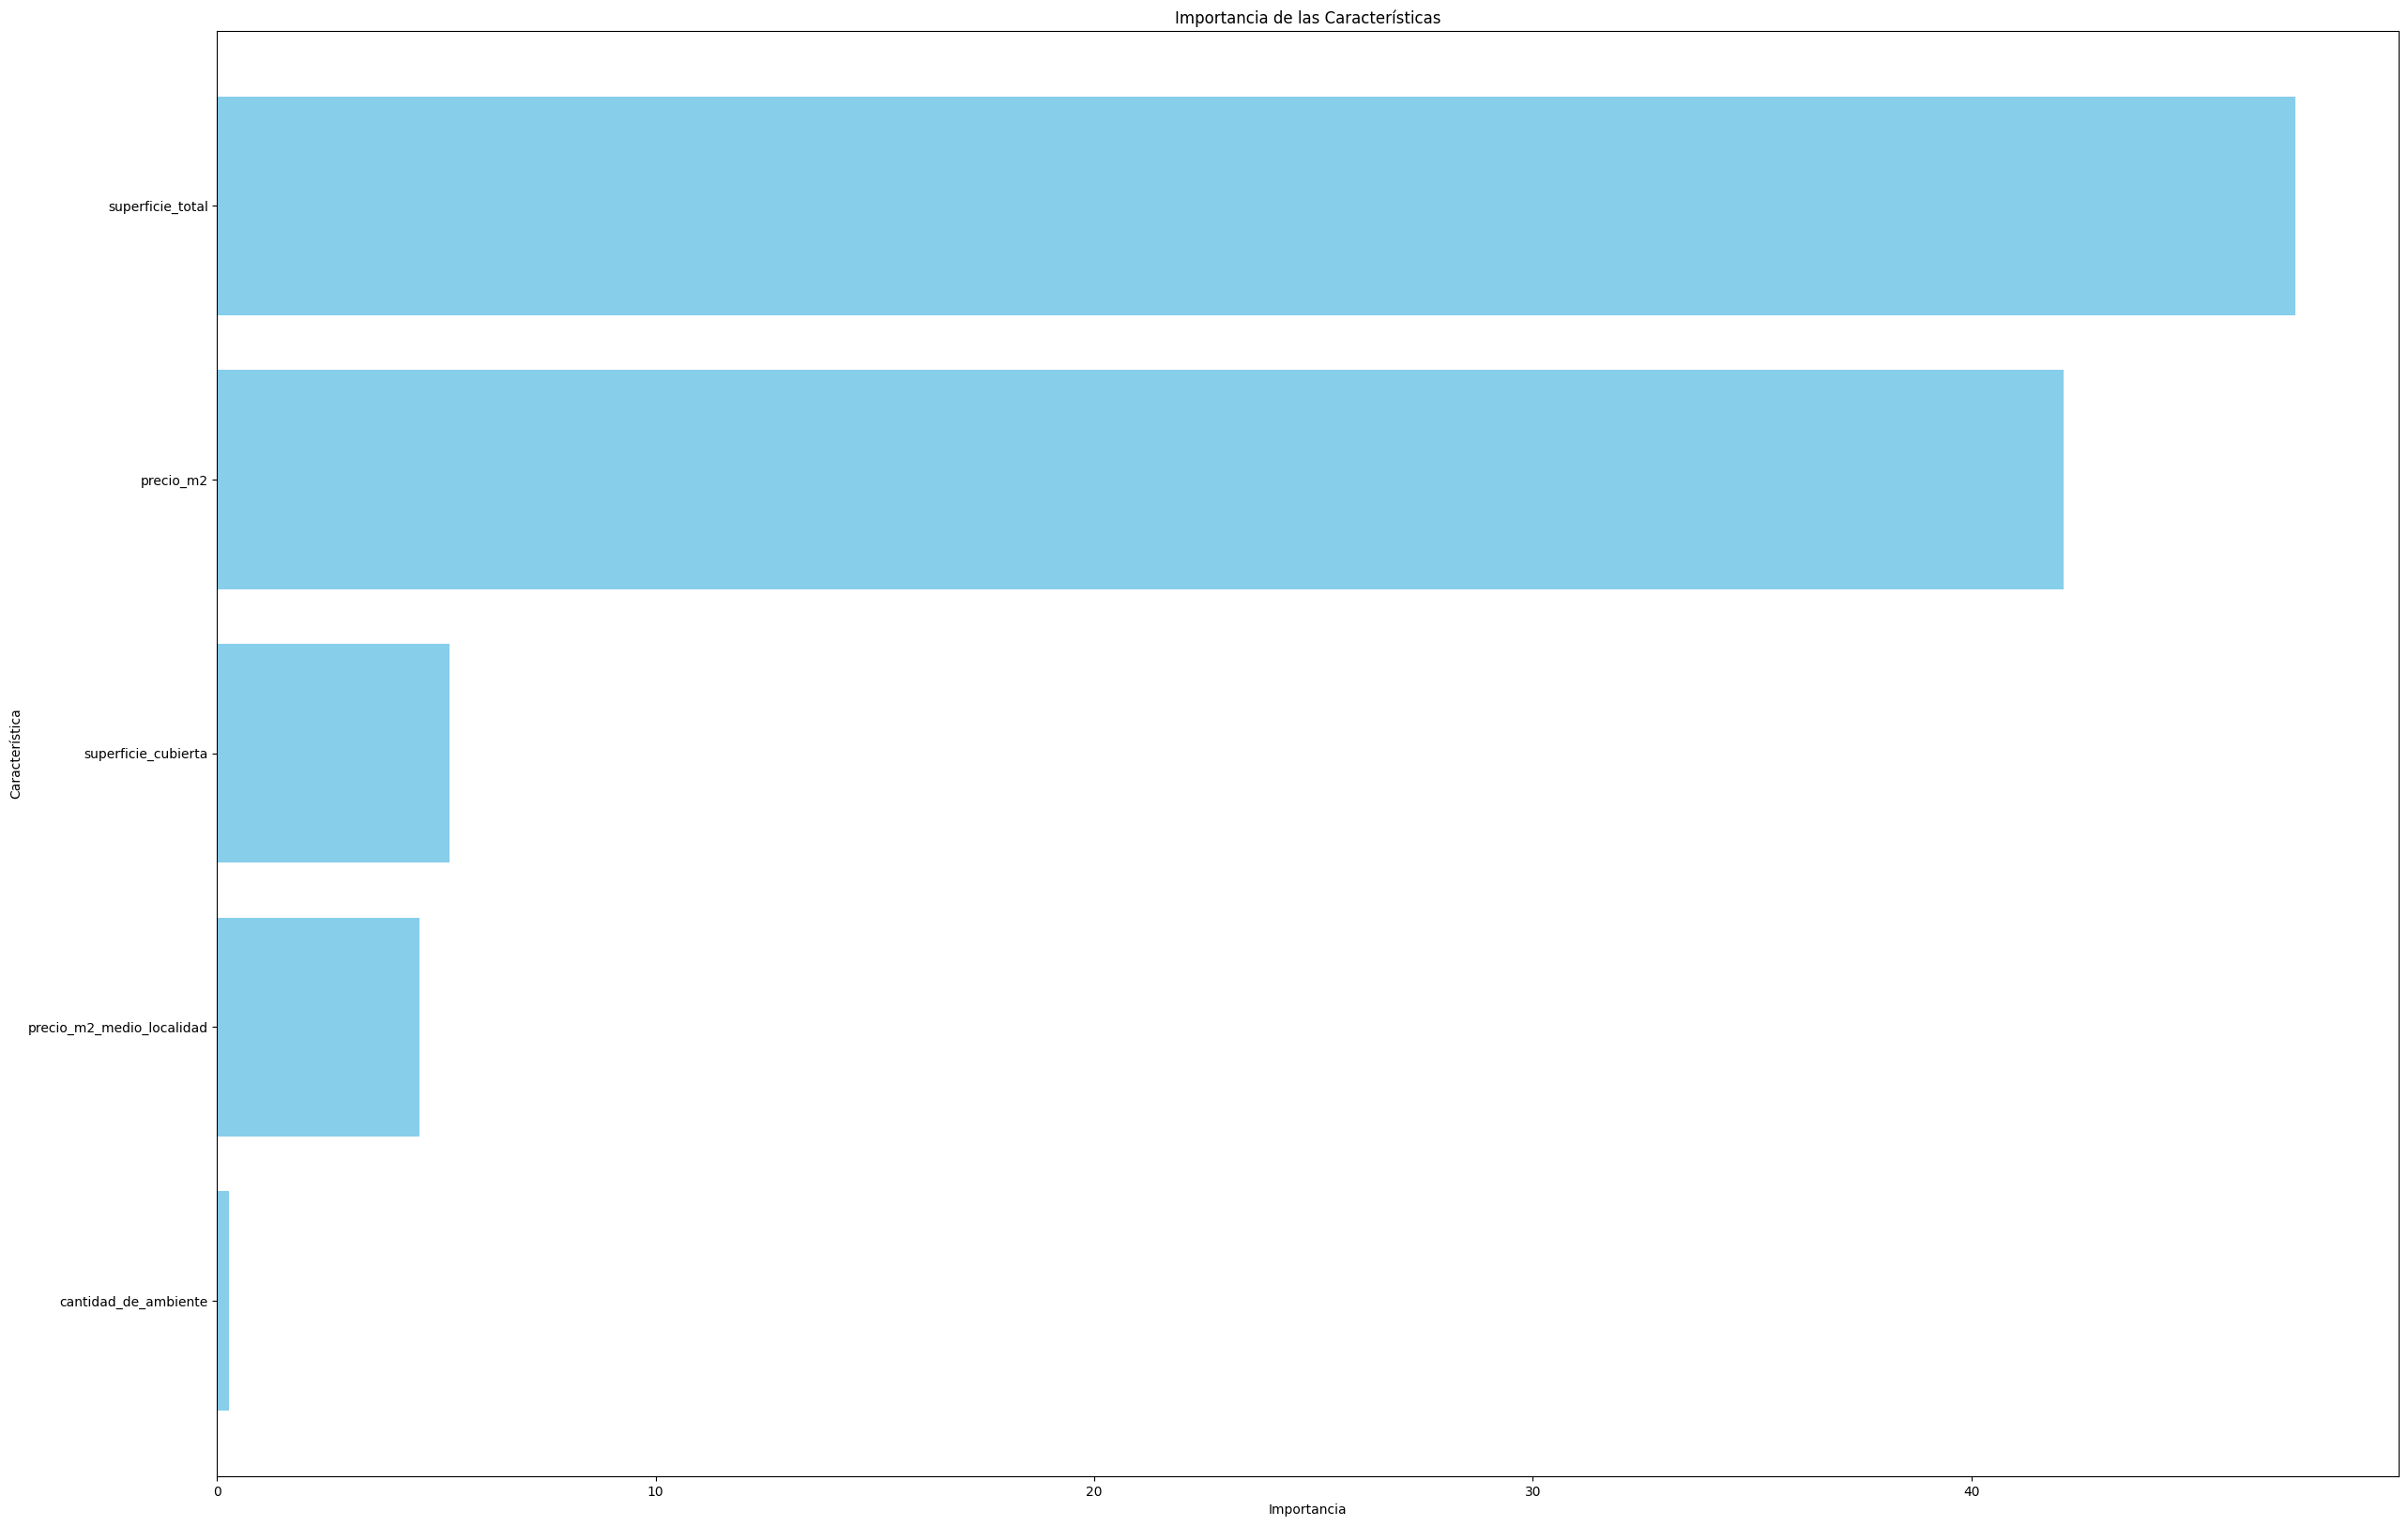

In [283]:
# Obtener las importancias de las características
importancias = model.get_feature_importance()
columnas = X.columns

# Crear un DataFrame para facilitar la visualización
df_importancias = pd.DataFrame({'Característica': columnas, 'Importancia': importancias})

# Ordenar por importancia descendente
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

df_importancias = df_importancias[df_importancias["Importancia"]>0.25]

# Mostrar las importancias
print(df_importancias)

# Graficar las importancias
plt.figure(figsize=(30, 20))
plt.barh(df_importancias['Característica'], df_importancias['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características')
plt.gca().invert_yaxis()  # Invertir el eje y para que las más importantes estén arriba
plt.show()